## Inportance Sampling

앞에서 봤던 Rejection Samplig(기각 샘플링)의 경우, 샘플 추출시에 reject 비율이 굉장히 크다. 따라서 원하는 크기의 표본을 얻기까지 오랜시간이 걸리게 된다. 이러한 단점을 보완하는 샘플링 방법중에, wasted sample이 없도록 표본추출하는 방법을 Inportance sampling이라고 한다.

샘플링의 가장 큰 목적은 두가지이다.

1. 특정 확률밀도함수의 기댓값 계산
2. 특정 확률값 계산

따라서, 어떤 특정 값의 계산을 위해 샘플링을 한다면, 그 값을 필요로 하는 것이기 때문에 많은 표본을 추출할 필요가 없다. 즉 , 표본 추출시 버려지는 샘플이 없도록 효율적으로 샘플링을 한다는 말이다.

어떤 함수 $h(x)$에 대해서 기댓값은 다음과 같다.

$$E_f[h(x)]=\int h(x)f(x)dx$$

이 때, 원래 $f(x)$를 추출하는 것이 어려워, proposal distribution g(x)를 이용한 샘플링 방법이 존재한다. 여기서도 마찬가지로 $f(x)$에서 바로 샘플링 할 수 없기 때문에, $g(x)$에서 대신 샘플링 할 것이다.

$$E_f[h(x)]=\int h(x)f(x)dx = \int h(x){f(x)\over{g(x)}}g(x)dx=E_g[h(x){f(x)\over{g(x)}}]$$

이를 Monte Carlo Estimation을 통해 근사하면

$$E_f[h(x)]\approx {1\over{n}}\sum^n_{i=1}h(x_i){f(x_i)\over{g(x_i)}}$$

이 식을 다시 정리하면

$$E_f[h(x)]\approx {1\over{n}}\sum^n_{i=1}h(x_i){f(x_i)\over{g(x_i)}}={1\over{n}}\sum^n_{i=1}w(x_i)h(x_i) \: \text{weight:}w(x_i)={f(x_i)\over{g(x_i)}}$$

This applies when $P$ and $Q$ are both normalized

For unnormalized case

$$\mathbb{E}_{x\sim P}[f(x)]\approx{{\sum^n_{i=1}f(x_i){P(x_i)\over{Q(x_i)}}\over{\sum^n_{i=1}{P(x_i)\over{Q(x_i)}}}}}$$

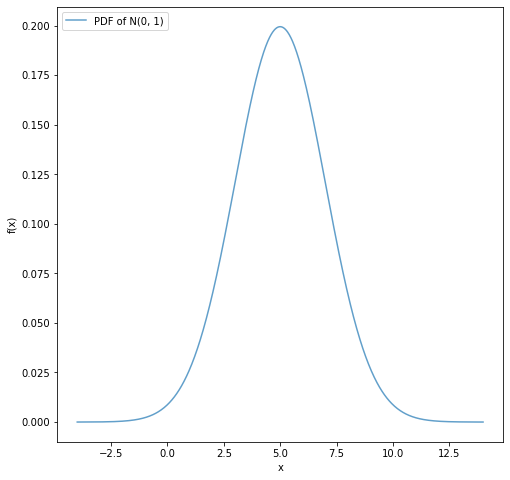

In [132]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

plt.figure(figsize=(8,8))
mu = 5
sigma = 2.0

x = np.linspace(-4, 14,1000)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma ** 2))

plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.show()

In [133]:
print('mu = ', mu)
print('sigma = ', sigma)

mu =  5
sigma =  2.0


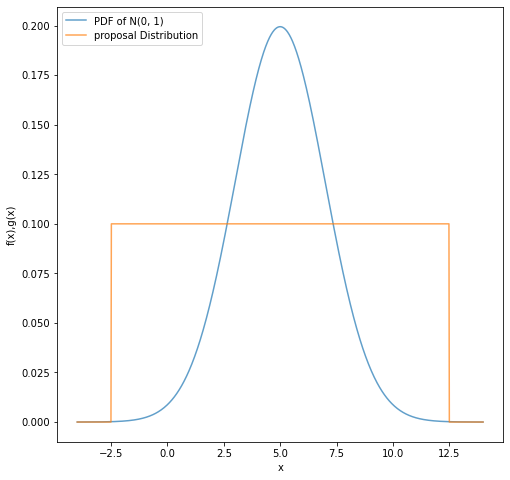

In [199]:
# M = 0.4/0.2
y2 = [ (i - i) if i < -2.5 or i > 12.5 else (i - i + 1/10) for i in x]
plt.figure(figsize=(8,8))
plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
# plt.plot(x, y1, alpha=0.7, label='Uniform Distribution')
plt.plot(x, y2, alpha=0.7, label='proposal Distribution')
plt.ylabel('f(x),g(x)')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.show()

In [200]:

y2 = [ (i - i) if i < -2.5 or i > 12.5 else (i - i + 1/10) for i in x]
den = 0.
expected_f_x = 0.
for i in range(10000):
    x_0 = np.random.randint(0,1000, 1)
    importance = y[int(x_0)] / (y2[int(x_0)]+1e-20)
    den += importance
    expected_f_x += importance * x[x_0]
expected_f_x /= den
print(expected_f_x)


[4.58201399]


확률밀도함수 $p(x)$에 기반한 함수 $f(x)$의 분산은 정의에 의해서 다음과 같이 계산이 된다.

$$\text{var}_{p(x)}[f(x)]=\mathbb{E}_{x\sim p(x)}[(f(x))^2]-(\mathbb{E}_{x\sim p(x)}[f(x)])^2$$

Importance sampling의 분산도 정의에 의해 다음과 같이 계산된다.

$$\text{var}_{q(x)}[{p(x)\over{q(x)}}f(x)]=\mathbb{E}_{x\sim q(x)}[({p(x)\over{q(x)}}f(x))^2]-(\mathbb{E}_{x\sim q(x)}[{p(x)\over{q(x)}}f(x)])^2$$

두 분산의 크기를 비교하기 위해서 식을 좀 더 전개하면

$$\text{var}_{q(x)}[{p(x)\over{q(x)}}f(x)]=\int_x({p(x)\over{q(x)}}f(x))^2q(x)dx-(\mathbb{E}_{x\sim p(x)}[f(x)])^2\\ =\int_x{p(x)\over{q(x)}}(f(x))^2q(x)dx-(\mathbb{E}_{x\sim p(x)}[f(x)])^2 \\ = \mathbb{E}_{x\sim q(x)}[{p(x)\over{q(x)}}(f(x))^2]-(\mathbb{E}_{x\sim p(x)}[f(x)])^2$$

위 식을 확률 밀도함수 p(x)에 기반한 함수 f(x)의 분산과 비교해 보면 중요 샘플링의 분산 ${p(x)\over{q(x)}}$값에 따라서 원래 분산보다 매우 커질 수 있음을 알 수 있다.